## Comparación de Algoritmos de Aprendizaje Automático con el "Car Evaluation Dataset" 

<p> El dataset así como su descripción se puede encontrar en el siguiente <a href="http://archive.ics.uci.edu/ml/datasets/Car+Evaluation">link</a>

## Primera Parte: Resultados Experimento Weka 

### Carga de Resultados Experimento Weka

In [192]:
ex = pd.read_csv('car-results2.txt',sep='\s+',skiprows=1, header=None, names =['Scheme','Number_correct','Number_incorrect',
                                                                   'Number_unclassified','Percent_correct',
                                                                   'Root_mean_squared_error','TP_rate','FP_rate',
                                                                   'IR_precision','IR_recall','F_measure','AUC_ROC',
                                                                   'Elapsed_time_training'])
ex.head()

,Scheme,Number_correct,Number_incorrect,Number_unclassified,Percent_correct,Root_mean_squared_error,TP_rate,FP_rate,IR_precision,IR_recall,F_measure,AUC_ROC,Elapsed_time_training
(1),functions.MultilayerPerceptron,173,0,0,100.000000,0.019622,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.457
(2),functions.MultilayerPerceptron,172,1,0,99.421965,0.046454,1.000000,0.019231,0.991803,1.000000,0.995885,0.999841,3.506
(3),functions.MultilayerPerceptron,171,2,0,98.843931,0.076573,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.526
(4),functions.MultilayerPerceptron,171,2,0,98.843931,0.047021,0.991736,0.019231,0.991736,0.991736,0.991736,0.999841,3.503
(5),functions.MultilayerPerceptron,173,0,0,100.000000,0.021335,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.513


In [197]:
pr = ex.groupby('Scheme').mean()
pr

,Number_correct,Number_incorrect,Number_unclassified,Percent_correct,Root_mean_squared_error,TP_rate,FP_rate,IR_precision,IR_recall,F_measure,AUC_ROC,Elapsed_time_training
Scheme,,,,,,,,,,,,
functions.MultilayerPerceptron,171.720000,1.080,0.000000,99.375319,0.045038,0.996860,0.004231,0.998192,0.996860,0.997510,0.999870,3.450680
rules.PART,165.340000,7.460,0.000000,95.683224,0.129765,0.976033,0.013922,0.994045,0.976033,0.984877,0.991432,0.003920
rules.Prism,155.333333,6.125,11.333333,89.899026,0.134941,0.998621,0.017244,0.994200,0.998621,0.996390,0.991522,0.026646
trees.J48,159.560000,13.240,0.000000,92.338822,0.166429,0.961488,0.063250,0.972923,0.961488,0.966997,0.980799,0.001280
trees.LMT,169.980000,2.820,0.000000,98.367993,0.078075,0.995537,0.011214,0.995259,0.995537,0.995383,0.998607,2.268880
trees.RandomForest,163.460000,9.340,0.000000,94.595107,0.160657,0.971570,0.030890,0.986671,0.971570,0.978995,0.996447,0.050360


In [199]:
pr[['F_measure','TP_rate','FP_rate','Elapsed_time_training']]

,F_measure,TP_rate,FP_rate,Elapsed_time_training
Scheme,,,,
functions.MultilayerPerceptron,0.997510,0.996860,0.004231,3.450680
rules.PART,0.984877,0.976033,0.013922,0.003920
rules.Prism,0.996390,0.998621,0.017244,0.026646
trees.J48,0.966997,0.961488,0.063250,0.001280
trees.LMT,0.995383,0.995537,0.011214,2.268880
trees.RandomForest,0.978995,0.971570,0.030890,0.050360


## Segunda Parte: Comparación de técnicas disponibles en sci-kit learn 

### Carga de librerías necesarias

In [136]:
import os
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances
from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import RadViz
from yellowbrick.features import Rank2D
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import LearningCurve
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing



### Carga del Dataset 

In [95]:
cd = pd.read_csv('car.data', names=['buying','maint','doors','persons','lug_boot','safety','Class'], header=None)
cd.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Resumen del conjunto de datos 

In [96]:
cd.describe()

,buying,maint,doors,persons,lug_boot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,4,big,low,unacc
freq,432,432,432,576,576,576,1210


### Distribución de valores de las clases en el atributo de salida. 

In [97]:
cd['Class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64

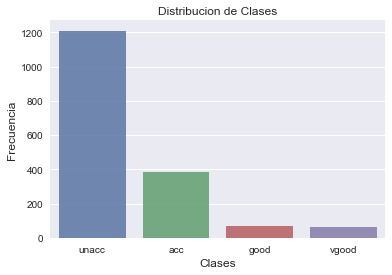

In [98]:
%matplotlib inline
def clases(cd):
    cc = cd['Class'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cc.index, cc.values, alpha=0.85)
    plt.title('Distribucion de Clases')
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xlabel('Clases', fontsize=12)
    plt.show()
    
clases(cd)    

### Codificación de variables nominales

<p>Muchos de los algortimos de machine learning en Python utilizando scikitlearn requieren que los datos sean números. Existen varias formas de codificar variables categoricas en forma numerica. Aqui se reemplazaran por numeros que luego serán transformados en binarios y normalizados para asegurar que no existan diferencias por el tamaño (escala) de las variables </p>

In [225]:
car = cd.copy()

car['buying'] = car['buying'].astype('category')
car['maint'] = car['maint'].astype('category')
car['doors'] = car['doors'].astype('category')
car['persons'] = car['persons'].astype('category') 
car['lug_boot'] =car['lug_boot'].astype('category')
car['safety'] = car['safety'].astype('category')
car['Class'] = car['Class'].astype('category')

car['buying'] = car['buying'].cat.codes+1 
car['maint'] = car['maint'].cat.codes+1
car['doors'] = car['doors'].cat.codes+1
car['persons'] = car['persons'].cat.codes+1 
car['lug_boot'] =car['lug_boot'].cat.codes+1 
car['safety'] = car['safety'].cat.codes+1
car['Class'] = car['Class'].cat.codes+1 

car.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,4,4,1,1,3,2,3
1,4,4,1,1,3,3,3
2,4,4,1,1,3,1,3
3,4,4,1,1,2,2,3
4,4,4,1,1,2,3,3


### Visualización Radial

<p> Permite visualizar múltiples atributos normalizando los datos en los ejes resultantes desde el centro hasta su arco correspondiente. Permite entonces detectar la separabilidad de las clases y la existencia de ruido. </p> 

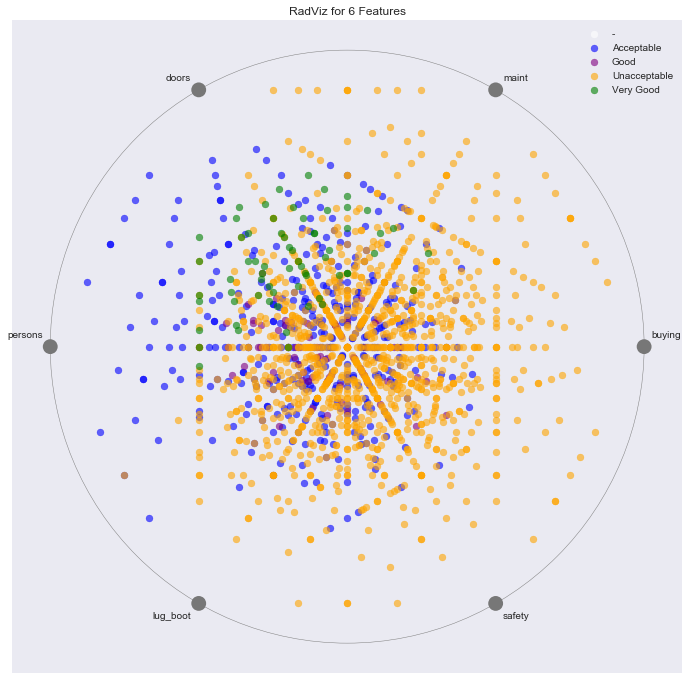

In [235]:
classes = ["-","Acceptable","Good","Unacceptable","Very Good"]

features = ['buying','maint','doors','persons','lug_boot','safety']
X = car[features].as_matrix()
Y = car['Class'].as_matrix()
_,ax = plt.subplots(figsize=(12,12))
visualizer = RadViz(classes=classes, features=features, alpha=0.6, color=['white','blue','purple','orange','green'])

visualizer.fit(X, Y)      
visualizer.transform(X)  
visualizer.poof()        

   ### Codificación Binaria de Atributos de Entrada 

<p>Al codificar de forma binaria las variables categóricas que previamente se habían codificado de forma numérica evitamos que algunos algoritmos interpreten relaciones inexistentes entre sus diferentes valores, por ejemplo  en el atributo buying realmente las instancias que tienen un precio de venta bajo equivalen a cuatro veces menos que aquellas que tiene un valor muy alto? La respuesta es no, por eso es recomendable realizar esta codificación.</p>

In [226]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
car_bi = encoder.fit_transform(car)
car_bi.head()

,buying_0,buying_1,buying_2,maint_0,maint_1,maint_2,doors_0,doors_1,doors_2,persons_0,persons_1,persons_2,lug_boot_0,lug_boot_1,lug_boot_2,safety_0,safety_1,safety_2,Class
0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,3
1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,3
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,3
3,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,3
4,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,3


<p>Se observa que ahora hay 3 columnas por cada atributo, las nuevas dimensiones incluida la columna Class son:</p>

In [236]:
car_bi.shape

(1728, 19)

### Normalización de los datos

<p>El objetivo de la normalización es permitirle a los algoritmos aumentar su desempeño colocando todos los valores en la misma escala. </p>

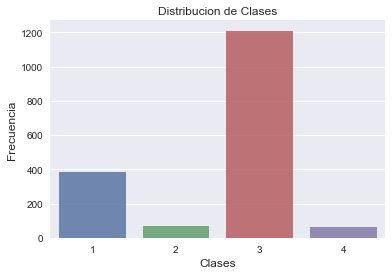

In [233]:
min_max_scaler = preprocessing.MinMaxScaler()
carn = car_bi[['buying_0', 'buying_1', 'buying_2', 'maint_0', 'maint_1', 'maint_2',
       'doors_0', 'doors_1', 'doors_2', 'persons_0', 'persons_1', 'persons_2',
       'lug_boot_0', 'lug_boot_1', 'lug_boot_2', 'safety_0', 'safety_1',
       'safety_2']]
np_scaled = min_max_scaler.fit_transform(carn)
carn = pd.DataFrame(np_scaled)
carn = pd.concat([carn,car_bi['Class']],axis=1)
carn.columns = ['buying_0', 'buying_1', 'buying_2', 'maint_0', 'maint_1', 'maint_2',
       'doors_0', 'doors_1', 'doors_2', 'persons_0', 'persons_1', 'persons_2',
       'lug_boot_0', 'lug_boot_1', 'lug_boot_2', 'safety_0', 'safety_1',
       'safety_2','Class']
clases(carn)


In [204]:
carn['Class'].value_counts()


3    1210
1     384
2      69
4      65
Name: Class, dtype: int64

In [205]:
carn.head()

,buying_0,buying_1,buying_2,maint_0,maint_1,maint_2,doors_0,doors_1,doors_2,persons_0,persons_1,persons_2,lug_boot_0,lug_boot_1,lug_boot_2,safety_0,safety_1,safety_2,Class
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3


### Gráficas 

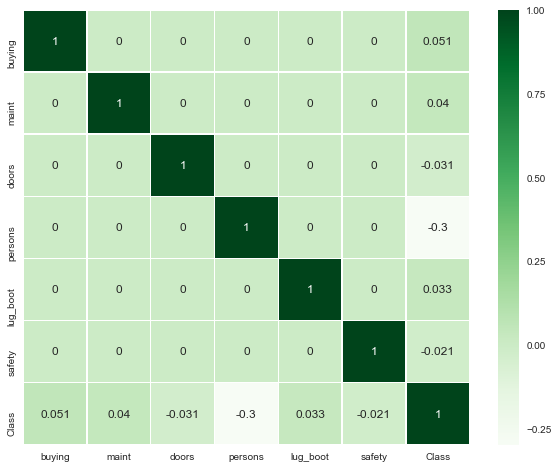

In [238]:
corr = car.corr()
fig, ax = plt.subplots(figsize=(10,8)) 
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.5, cmap="Greens")
plt.show()

## Comparación de modelos

### Separación de Datos en Test y Validación

In [214]:
array = carn.values
X = array[:,0:-1]
Y = array[:,-1] #Class
       
validation_size = 0.3
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,test_size=validation_size,random_state=seed)

print('X_train', X_train.shape)
print('X_validation', X_validation.shape)
print('Y_train', Y_train.shape)
print('X_validation', Y_validation.shape)


X_train (1209, 18)
X_validation (519, 18)
Y_train (1209,)
X_validation (519,)


###  Adición de los algortimos a un arreglo

<p>Con el uso de los algoritmos disponibles en sci-kit learn se va a comparar un clasificador de arboles de decisión llamado DecisionTreeClassifier, con un RandomForestClassifier que basicamente ejecuta varias veces un arbol de decision con un inicio aleatorio cada vez dandole mejores oportunidades de llegar a la convergencia total y el MLPClassifier que implementa el algoritmo de redes neuronales artificiales Multilayer Perceptron </p>

In [253]:
seed = 7
scoring = 'accuracy'
#Adicion de los modelos a un arreglo
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('MLP', MLPClassifier(activation='logistic', hidden_layer_sizes= (11,),solver='lbfgs')))


<p>Los parametros del MLPClassifier se utilizaron para tratar de emular la ejecucion en Weka con resultados similares. la funcion de activación logistic es la funcion sigmoide y el número de perceptrones se ha colocado en 11 en una sola capa oculta, el parámetro solver se refiere a la optimización de los pesos </p>

### Ejecución de Experimentos en un bucle

In [254]:
from sklearn.model_selection import cross_val_score
res_scores = []
m_names = []
for name, model in models:
    start_time = time.time()
    print(name)
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    scores = model_selection.cross_val_score(estimator=model,
                         X=X_train,
                         y=Y_train,
                         cv=kfold,
                         #n_jobs=-1,
                         scoring = scoring)
    print('Precisión de Validación Cruzada: %.5f +/- %.5f' % (np.mean(scores),np.std(scores)))
    res_scores.append(scores)
    m_names.append(name)
    print('---Duración: %.3f segundos ---' % (time.time() - start_time))

RFC
Precisión de Validación Cruzada: 0.87759 +/- 0.03041
---Duración: 0.148 segundos ---
DTC
Precisión de Validación Cruzada: 0.92139 +/- 0.02331
---Duración: 0.018 segundos ---
MLP
Precisión de Validación Cruzada: 0.96775 +/- 0.02491
---Duración: 1.697 segundos ---


### Diagrama de Comparación de Resultados 

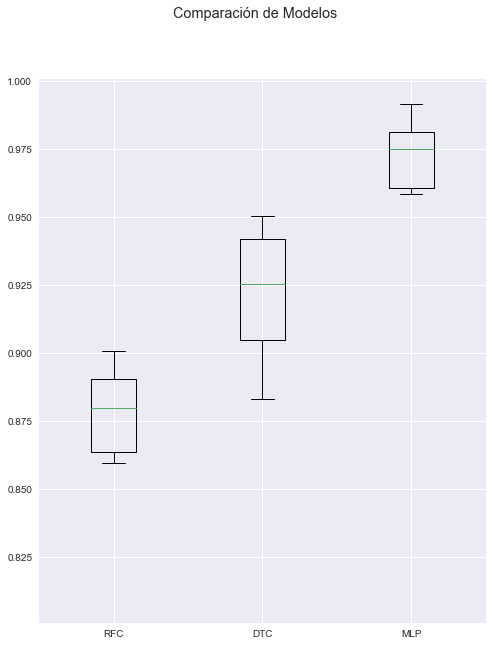

In [255]:
fig = plt.figure(figsize=(8, 10))
fig.suptitle('Comparación de Modelos')
ax = fig.add_subplot(111)
plt.boxplot(res_scores)
ax.set_xticklabels(m_names)
plt.show()

## Comparación Gráfica con datos desconocidos (set de validación) 

RFC
0.8535645472061657
[[ 86   8  17   1]
 [ 11   5   0   1]
 [ 24   0 339   0]
 [  8   4   2  13]]


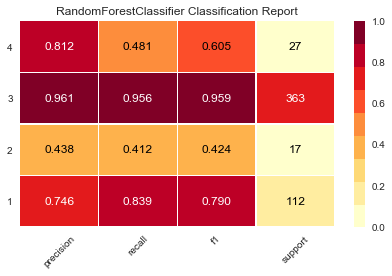

DTC
0.9595375722543352
[[101   3   8   0]
 [  1  11   2   3]
 [  3   1 359   0]
 [  0   0   0  27]]


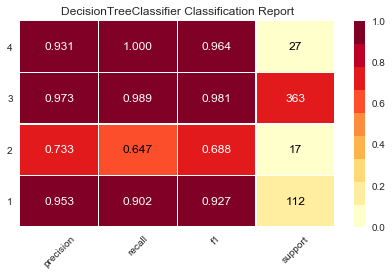

MLP
0.9865125240847784
[[110   1   1   0]
 [  0  13   0   4]
 [  1   0 362   0]
 [  0   0   0  27]]


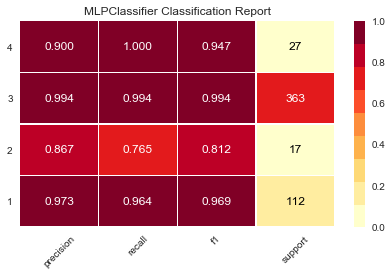

In [256]:
classes = [1,2,3,4]
def plotting(name, model):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    visualizer = ClassificationReport(model, classes=classes, support=True)
    visualizer.fit(X_train, Y_train)  # Fit the visualizer and the model
    visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
    g = visualizer.poof()             # Draw/show/poof the data
    
for name, model in models:
    plotting(name, model)

### Error en la predicción de la clase 

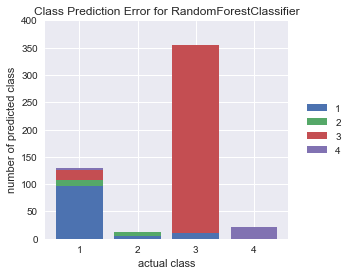

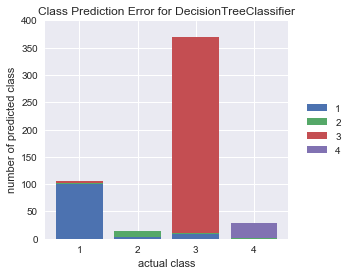

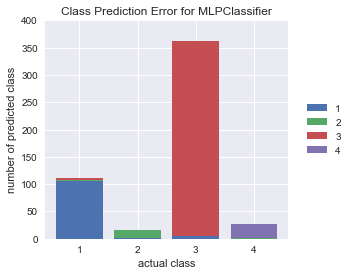

In [257]:
def vizerror(name, model):
    visualizer = ClassPredictionError(
        model, classes=classes)
    visualizer.fit(X_train, Y_train)
    visualizer.score(X_validation, Y_validation)
    visualizer.poof()
    
for name, model in models:
    vizerror(name, model)

### ROC AUC Curve 

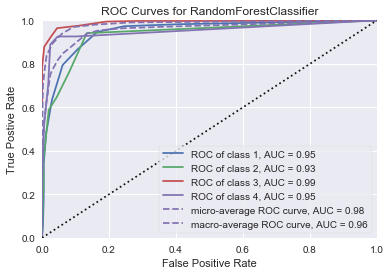

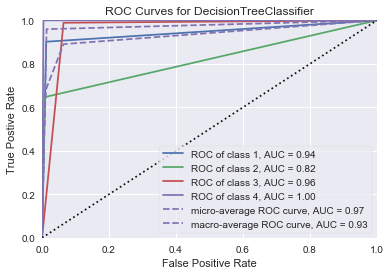

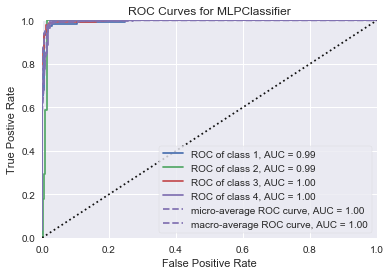

In [258]:

def vizerror(name, model):
    # Instantiate the visualizer
    visualizer = ROCAUC(model, classes=classes)
    # Fit
    visualizer.fit(X_train, Y_train)
    # Score and visualize
    visualizer.score(X_validation, Y_validation)
    visualizer.poof()
    
for name, model in models:
    vizerror(name, model)

### Matriz de Confusión 

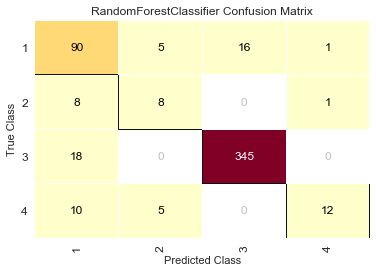

--- Duración: 0.116 segundos  ---


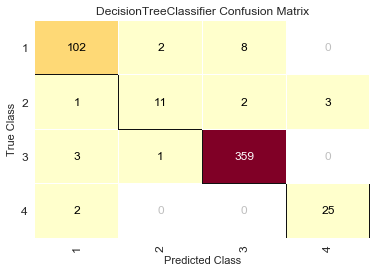

--- Duración: 0.098 segundos  ---


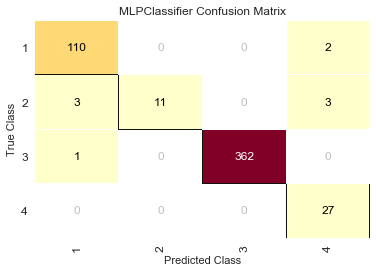

--- Duración: 0.246 segundos  ---


In [259]:
def vizerror(name, model):
    # Instantiate the visualizer
    cm = ConfusionMatrix(model, classes = [1,2,3,4])
    cm.fit(X_train, Y_train)
    cm.score(X_validation, Y_validation)
    cm.poof()
    
    
for name, model in models:
    start_time = time.time()
    vizerror(name, model)
    print('--- Duración: %.3f segundos  ---' % (time.time() - start_time))

### Curva de aprendizaje 

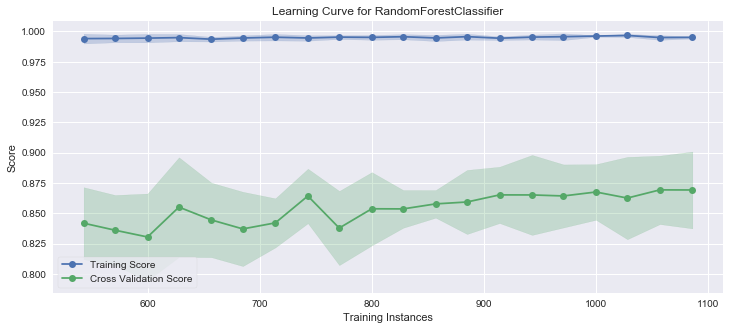

--- Duración: 3.148 segundos  ---


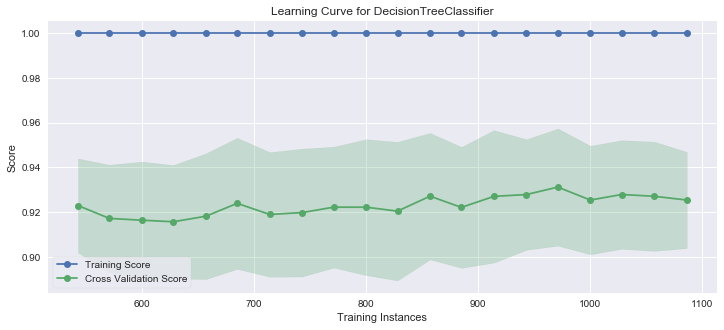

--- Duración: 0.487 segundos  ---


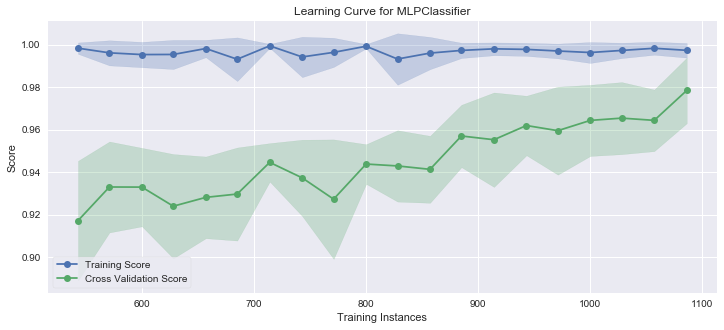

--- Duración: 24.163 segundos  ---


In [261]:
def vizerror(name, model):
    # Instantiate the visualizer
    # Create the learning curve visualizer
    cv = StratifiedKFold(10)
    
    sizes = np.linspace(0.5, 1.0, 20)
    _,ax = plt.subplots(figsize=(12,5))
    viz = LearningCurve(
        model, cv=cv, train_sizes=sizes,
        scoring=scoring)
    # Fit and poof the visualizer
    #viz.fit(X, Y)
    viz.fit(X_train, Y_train)
    viz.score(X_validation, Y_validation)
    viz.poof()
    
    
for name, model in models:
    start_time = time.time()
    vizerror(name, model)
    print('--- Duración: %.3f segundos  ---' % (time.time() - start_time))